In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [10]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

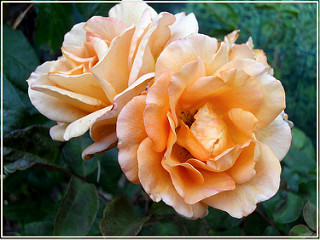

In [13]:
import PIL.Image
PIL.Image.open(str(roses[2]))

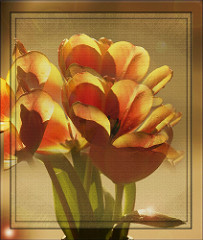

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [20]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [22]:
x, y = [], []
for flower_name, images in  flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(100,100))
        x.append(resize_img)
        y.append(flowers_labels_dict[flower_name])


In [23]:
x = np.array(x)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [25]:
len(x_train)

2752

In [26]:
len(x_test)

918

In [27]:
x_train_scale = x_train /255
x_test_scale = x_test /255

In [32]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scale, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4029 - loss: 1.3936
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5930 - loss: 1.0368
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6597 - loss: 0.8911
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6995 - loss: 0.7732
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7608 - loss: 0.6416
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8241 - loss: 0.4795
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8844 - loss: 0.3523
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9227 - loss: 0.2507
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9484 - loss: 0.1654
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9645 - loss: 0.1147
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9652 - loss: 0.1097
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy:

In [33]:
predictions = model.predict(x_test_scale)
predictions


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[  0.55896544,  18.538977  ,   5.8928814 , -16.24724   ,
         -9.83863   ],
       [ 12.754315  ,   5.2409396 ,   0.4558004 , -11.066354  ,
         -4.0660005 ],
       [ -5.255666  ,  -9.895604  ,  20.216383  ,  -2.5992975 ,
         -4.501189  ],
       ...,
       [-14.298111  ,  -1.6759696 ,   4.535142  ,  17.152582  ,
          1.5627282 ],
       [  9.467377  ,  -1.2301171 ,  -0.68891597,  -3.7635026 ,
          3.386291  ],
       [-10.436717  , -18.229897  ,   6.811315  ,  36.13677   ,
          1.8484836 ]], dtype=float32)

In [34]:
score = tf.nn.softmax(predictions[0])


In [35]:
np.argmax(score)

1

In [43]:
data_augmentation = keras.Sequential([
    keras.layers.RandomZoom(0.9)
])

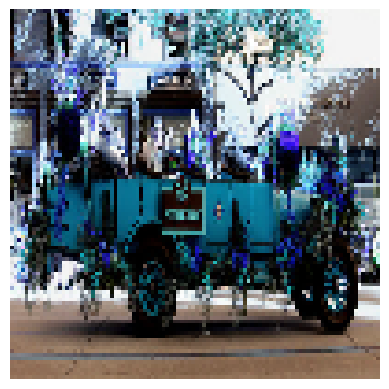

In [39]:
plt.axis('off')
plt.imshow(x[0])

In [40]:
data_augmentation(x[0])

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[ 70.494156,  78.285866, 101.63817 ],
        [ 57.343212,  66.86238 ,  86.047615],
        [ 37.874004,  42.49318 ,  51.379463],
        ...,
        [244.      , 244.      , 244.      ],
        [244.      , 244.      , 244.      ],
        [244.      , 244.      , 244.      ]],

       [[ 84.92213 ,  96.334404, 121.00822 ],
        [ 64.132484,  75.32624 ,  95.898705],
        [ 33.11893 ,  36.565693,  45.718056],
        ...,
        [244.      , 244.      , 244.      ],
        [244.      , 244.      , 244.      ],
        [244.      , 244.      , 244.      ]],

       [[ 96.314156, 112.039345, 137.81209 ],
        [ 75.95043 ,  91.22676 , 112.25918 ],
        [ 38.796253,  43.304596,  53.818737],
        ...,
        [244.      , 244.      , 244.      ],
        [244.      , 244.      , 244.      ],
        [244.      , 244.      , 244.      ]],

       ...,

       [[141.33914 , 114.50691 ,  94.60875 ],
        [138.

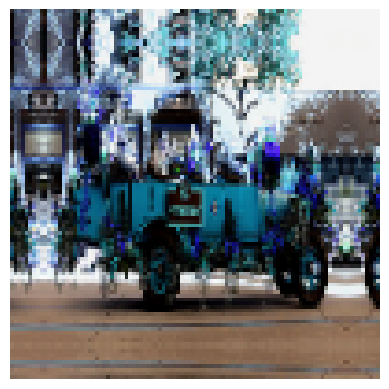

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(x[0]).numpy().astype('uint8'))

In [45]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scale, y_train, epochs=30)

Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_2" is incompatible with the layer: expected shape=(None, 100, 3), found shape=(32, 100, 100, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(32, 100, 100, 3), dtype=float32, sparse=None, name=keras_tensor_14>',)
  • kwargs={'mask': 'None'}